In [1]:
#the HABERMAN's SURVIVAL
#This data set contain 4 variable(independent variables=3 (age, operation_ year,axil_node), DEpendent variables=1(the results))
#From this data i need to predict what is the maximum living age for the people done the operation.


#I need to calculate how many survived 5 years after the operation

# 1 is alive
# 2 is dead


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

habermans= pd.read_csv("C://Users/vivekanandam/Desktop/applied AI/datasets/haberman.csv")
habermans.shape


(306, 4)

In [4]:
print(habermans.columns)

Index(['Age', 'Operation_year', 'axil_nodes', 'Results'], dtype='object')


In [5]:
habermans["Results"].value_counts()

# this shows how many different results are present.

1    225
2     81
Name: Results, dtype: int64

1) Total 306 patients of which 225 patients successfully survived for 5 or more years after their operation.
2) 81 patients didn't survive more than 5 years after their operation.

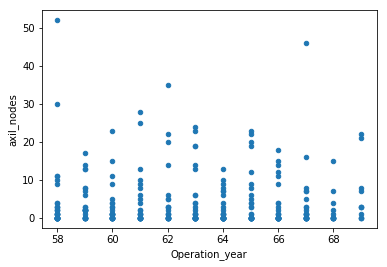

In [19]:
#Below are the different types of plots and i have described what i infer from the graphs
# 2D scater plot

habermans.plot(kind='scatter',x='Operation_year',y='axil_nodes',legend=True)

# not so clear

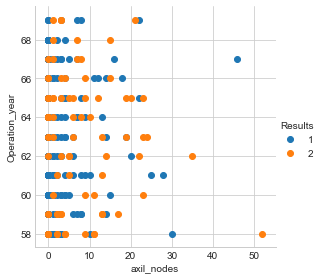

In [20]:
sns.set_style("whitegrid");
sns.FacetGrid(habermans, hue="Results", size=4) \
   .map(plt.scatter, "axil_nodes", "Operation_year") \
   .add_legend();
plt.show();
plt.close();
#The two types of results which are closly coupled but cannt make much inference 


# Pair plots

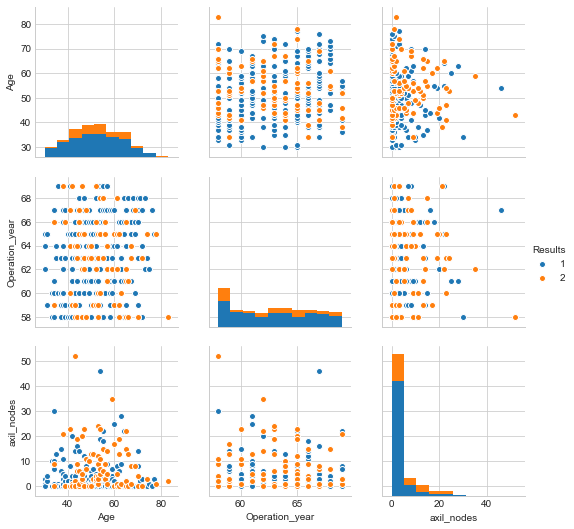

In [62]:
sns.set_style("whitegrid");
sns.pairplot(habermans,hue='Results',vars=['Age','Operation_year','axil_nodes']);
plt.show();
plt.close();

Observations:

    There is a lot of overlap between the two classes and lot of axil_nodes lie below 5

In [16]:
# divided the data set based on the two different types of Results
hab_1= habermans.loc[habermans["Results"]== 1];
hab_2= habermans.loc[habermans["Results"]== 2];
print(hab_1.shape)
print(hab_2.shape)

(225, 4)
(81, 4)


#  PDF 

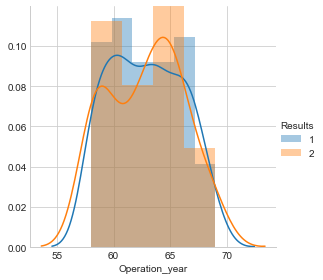

In [86]:
sns.FacetGrid(habermans, hue="Results", size=4) \
   .map(sns.distplot, "Operation_year") \
   .add_legend();
plt.show();


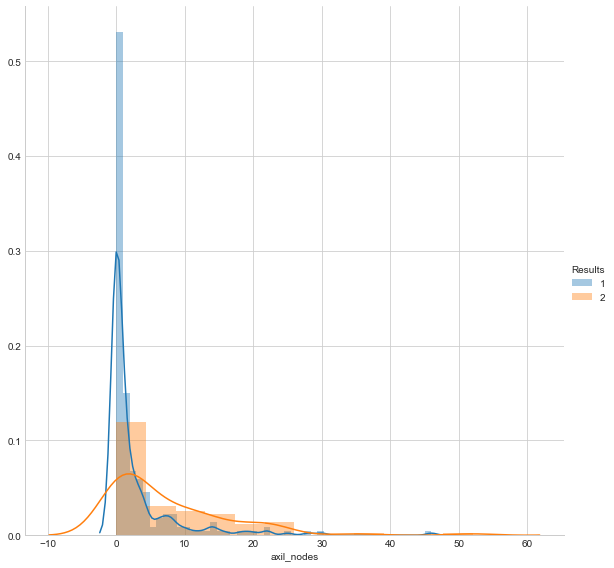

In [108]:

sns.FacetGrid(habermans, hue="Results", size=8) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.show();

 

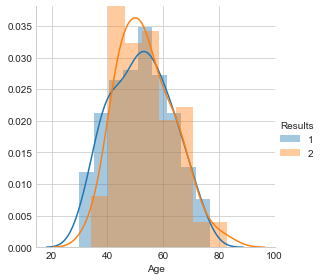

In [91]:
sns.FacetGrid(habermans, hue="Results", size=4) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();


Observations:
1) It can be seen from PDFs that Age and Year do not give useful insights as there is lot of overlapping.
2) Axillary nodes is an useful feature that can be used for knowing the survival status.
3) Most of the Patients who survived for more than 5 years had 0 Axillary nodes.

As we have created two new sets as hab_1 and hab_2 in the cell(16) based on Result

# CDF & PDF with respect to three attributes for the two sample sets hab_1, hab_2

[0.66666667 0.12444444 0.04444444 0.02666667 0.02222222 0.03111111
 0.00888889 0.00888889 0.00444444 0.01777778 0.00444444 0.00444444
 0.00444444 0.00444444 0.00888889 0.         0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00444444]
[ 0.          1.53333333  3.06666667  4.6         6.13333333  7.66666667
  9.2        10.73333333 12.26666667 13.8        15.33333333 16.86666667
 18.4        19.93333333 21.46666667 23.         24.53333333 26.06666667
 27.6        29.13333333 30.66666667 32.2        33.73333333 35.26666667
 36.8        38.33333333 39.86666667 41.4        42.93333333 44.46666667
 46.        ]


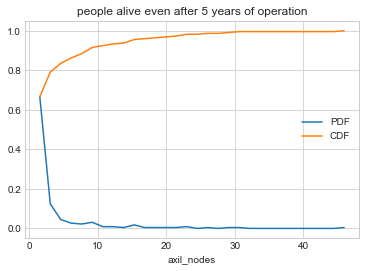

[0.33333333 0.14814815 0.08641975 0.03703704 0.04938272 0.0617284
 0.04938272 0.04938272 0.03703704 0.01234568 0.02469136 0.01234568
 0.02469136 0.04938272 0.         0.         0.         0.
 0.         0.         0.01234568 0.         0.         0.
 0.         0.         0.         0.         0.         0.01234568]
[ 0.          1.73333333  3.46666667  5.2         6.93333333  8.66666667
 10.4        12.13333333 13.86666667 15.6        17.33333333 19.06666667
 20.8        22.53333333 24.26666667 26.         27.73333333 29.46666667
 31.2        32.93333333 34.66666667 36.4        38.13333333 39.86666667
 41.6        43.33333333 45.06666667 46.8        48.53333333 50.26666667
 52.        ]


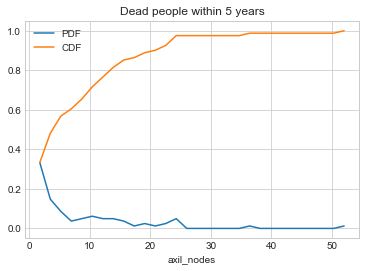

In [27]:
#Plot CDF of axil_node with hab_1 (living people)

counts, bin_edges = np.histogram(hab_1['axil_nodes'], bins=30, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF','CDF']);
plt.title("people alive even after 5 years of operation")
plt.xlabel('axil_nodes');

plt.show()


# based on dead people
counts, bin_edges = np.histogram(hab_2['axil_nodes'], bins=30, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF','CDF']);
plt.title("Dead people within 5 years")
plt.xlabel('axil_nodes');
plt.show()



from the first plot generated from the Hab_1
1) people having less than 5 Axillary nodes, were alive almost of 80% of people survied.
2) lesser the axillary nodes greater the chance of survival.


from the second plot generated from the Hab_2
1) 80% of people dead within 5 years of operation done who has 15 axil_ nodes
2) lesser the axillary nodes greater the chance of survival.